# Basic Operations

In [41]:
import os
import copy
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, normalize
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
df = pd.read_csv(r"C:/ML Projects/Diamond Price Prediction/notebooks/data/gemstone.csv")
df.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/01_raw.csv", index = False)
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
len(df)

193573

In [21]:
df.drop(columns = ['id'], inplace = True)
df.rename(columns = {'price': 'target'}, inplace = True)

X = df.drop(columns = ['target'])
y = df['target']

df.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/02_df_target_removed_id.csv", index = False)
X.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/03_X.csv", index = False)
y.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/04_y.csv", index = False)

In [22]:
num_columns = X.select_dtypes(include = 'number').columns.tolist()
cat_columns = X.select_dtypes(include = 'object').columns.tolist()

cat_ordinal_columns = ['cut', 'color', 'clarity']

# Order is from low to high
cut_cat = ['Fair', 'Good', 'Very Good','Ideal', 'Premium']
color_cat = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cat = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

# Missing Values

In [23]:
df.isnull().sum().sum()

0

# Distribution, QQ plot, Bar plot

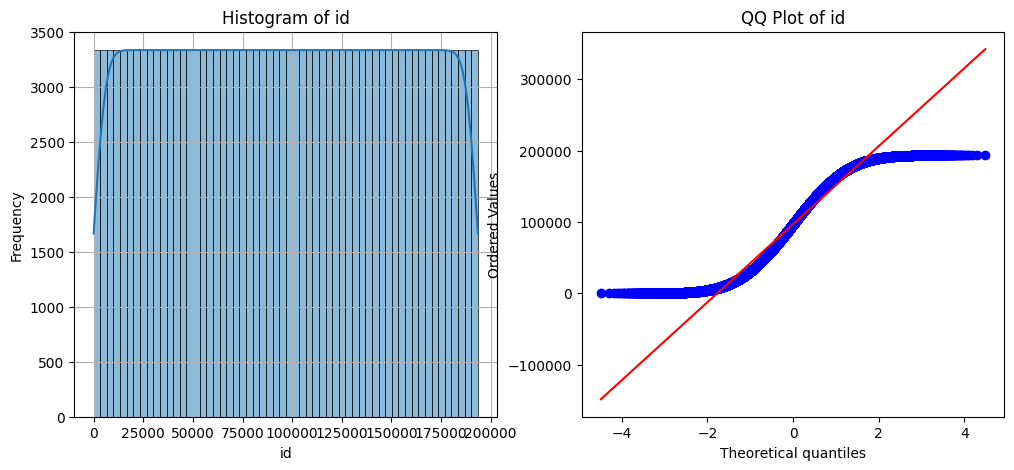

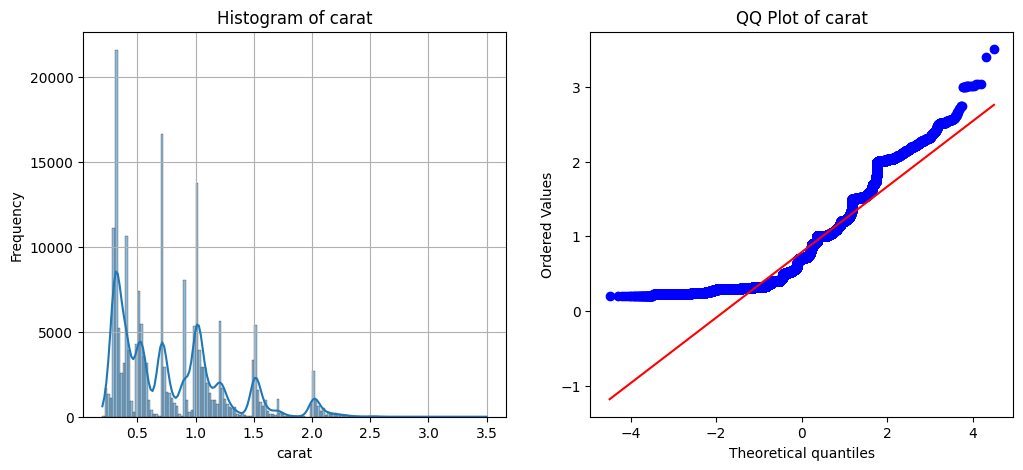

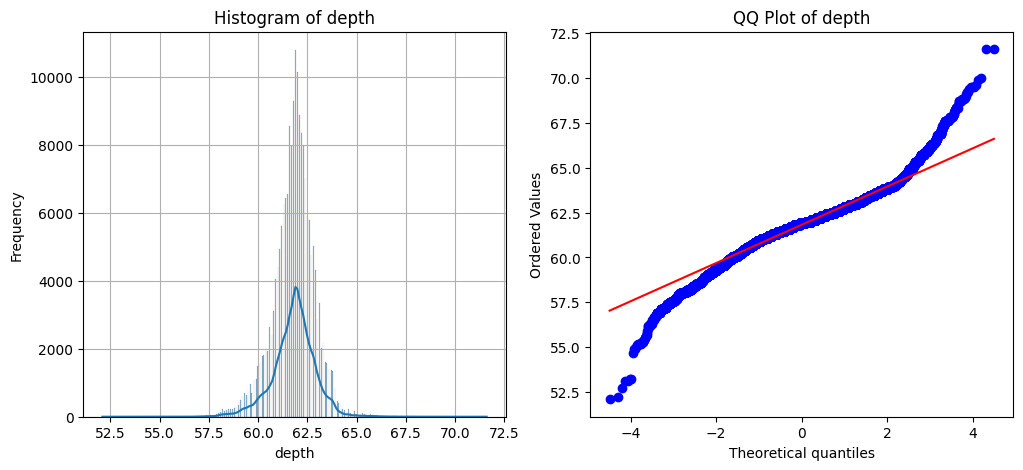

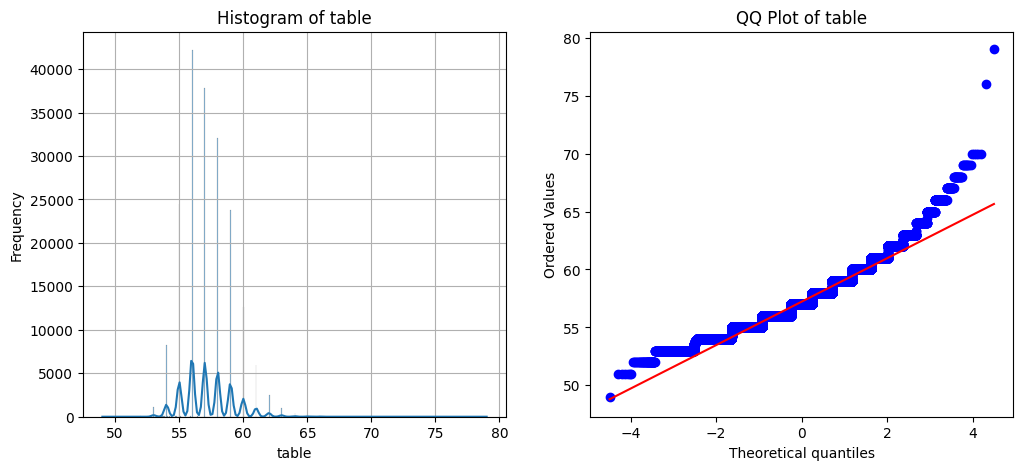

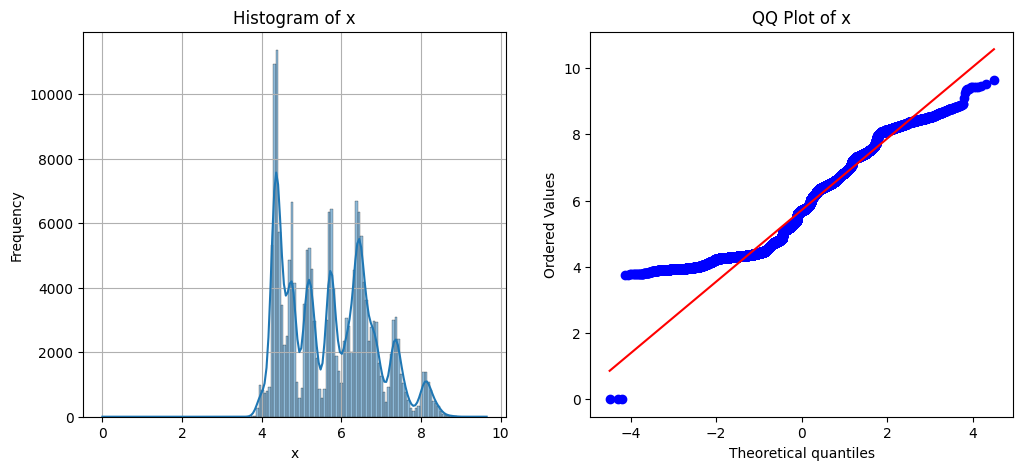

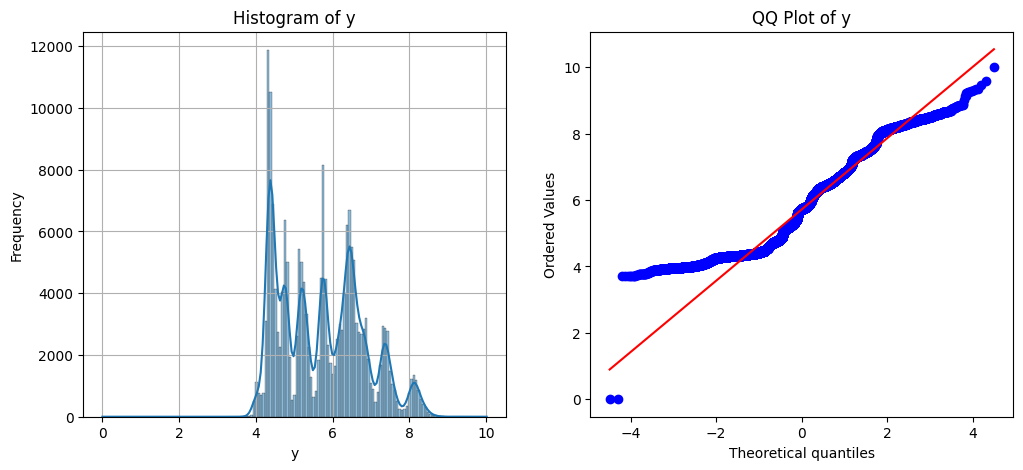

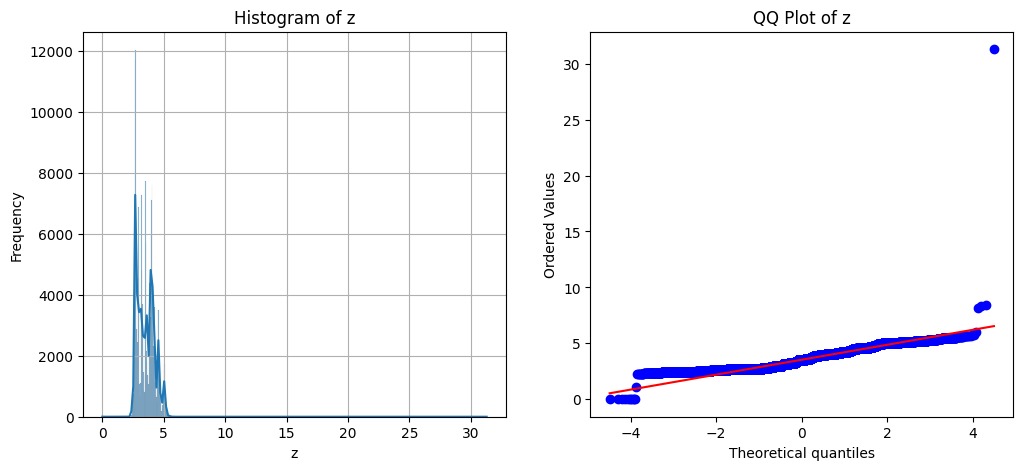

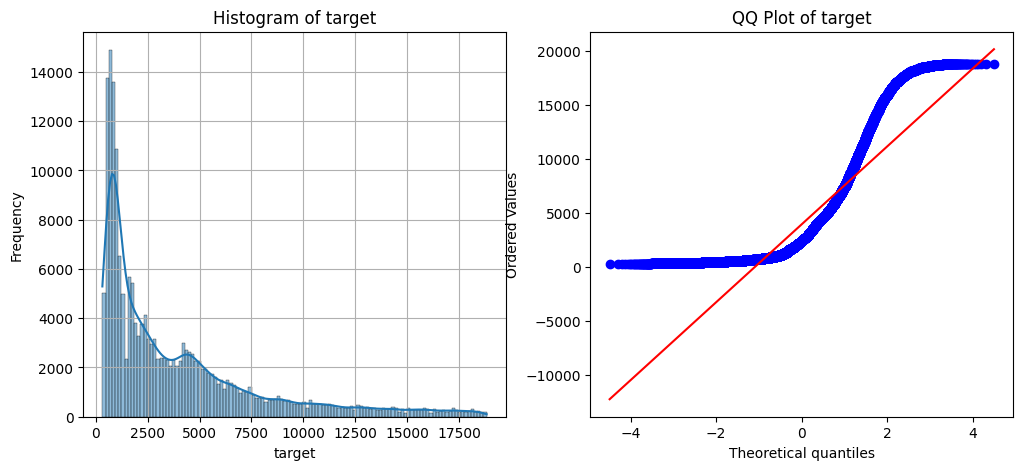

In [9]:
# Histogram and QQ plot of numerical columns
for col in num_columns:

    plt.figure(figsize = (12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(x = X[col], kde = True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    stats.probplot(X[col], dist = "norm", plot = plt)
    plt.title(f'QQ Plot of {col}')
        
    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_plots", f'{col}_histogram_QQplot.png'))
        
    plt.show()

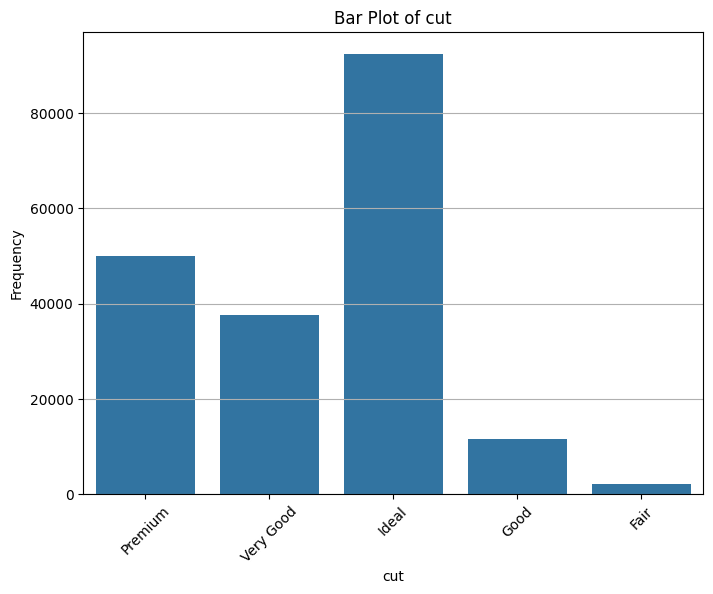

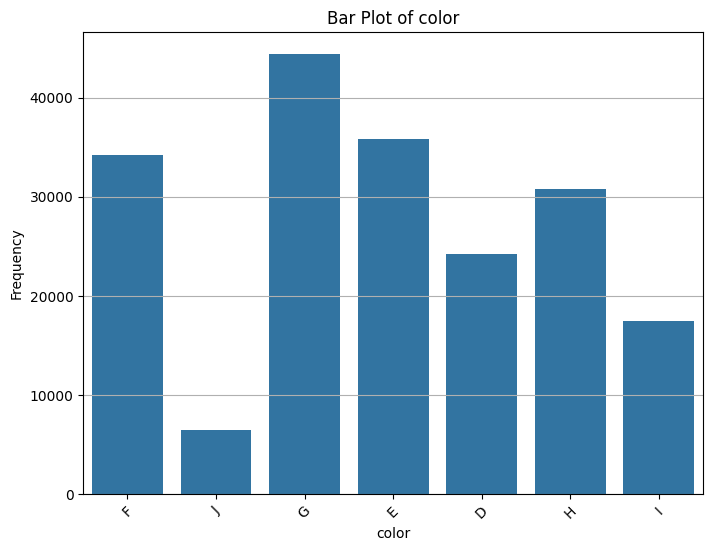

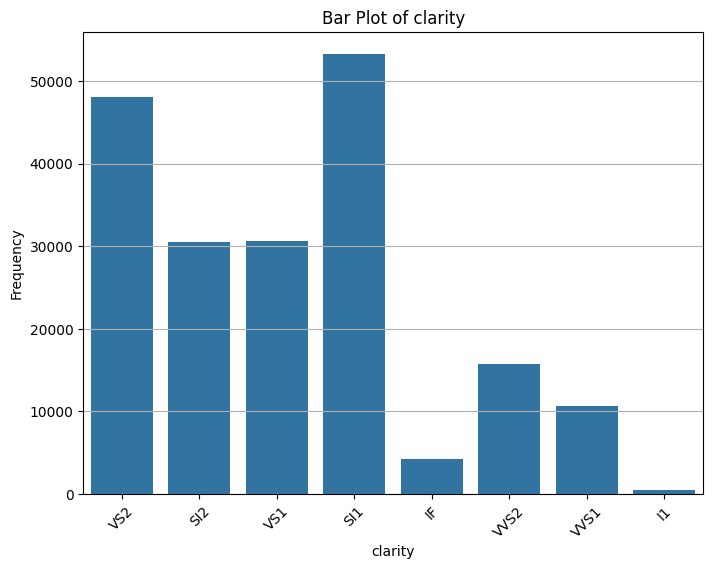

In [10]:
for col in cat_columns:

    plt.figure(figsize = (8, 6))
    
    sns.countplot(data = X, x = col)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 45)  
    plt.grid(axis = 'y')
    
    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_plots", f'{col}_barplot.png'))
    
    plt.show()

# Unbalanced dataset & less data points
1. The data set is quite balanced.
2. And the no. of rows are around 2 lakhs

# Outliers

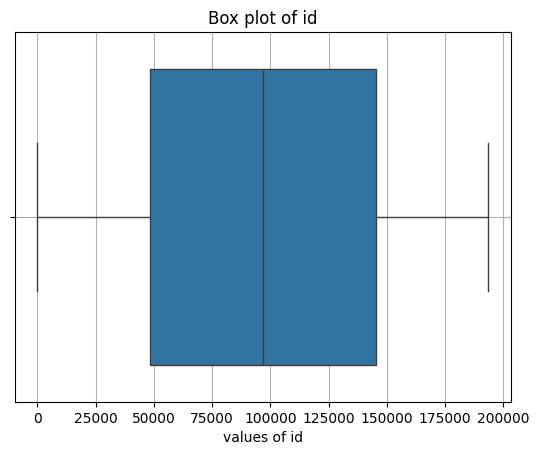

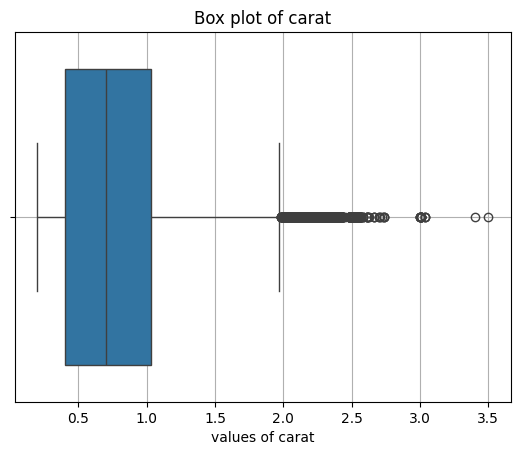

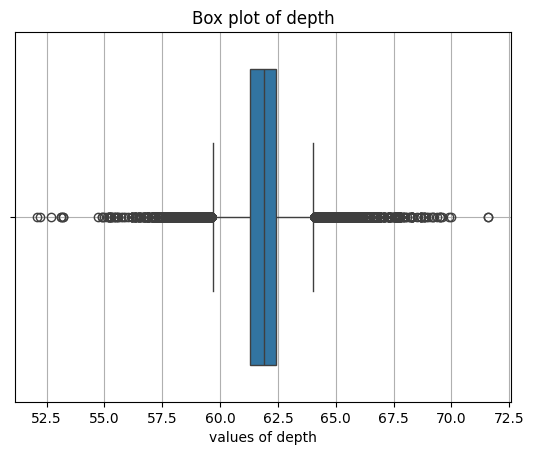

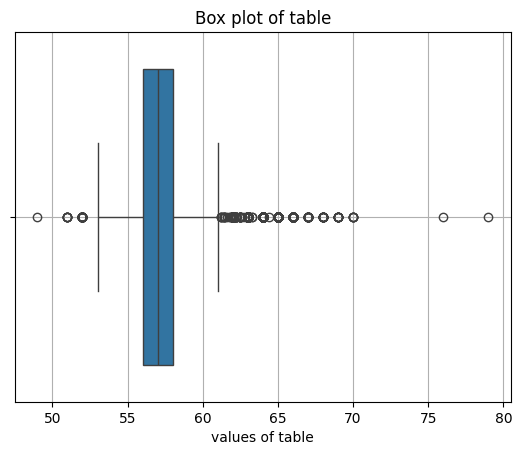

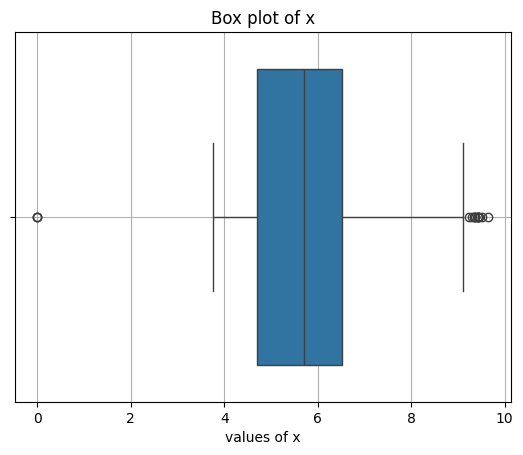

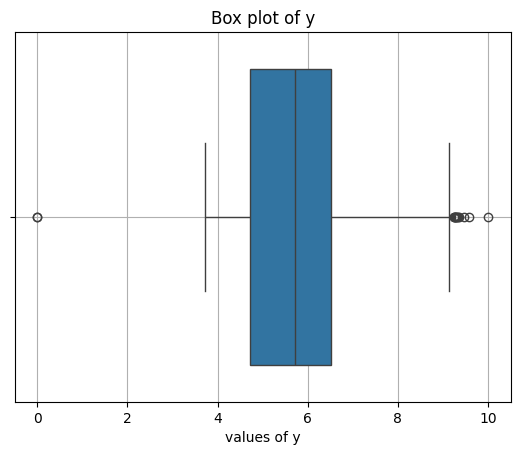

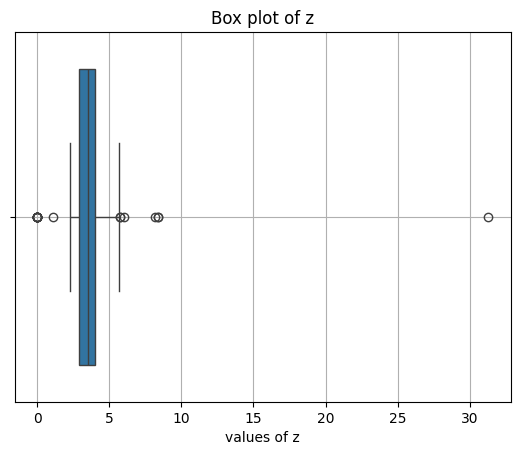

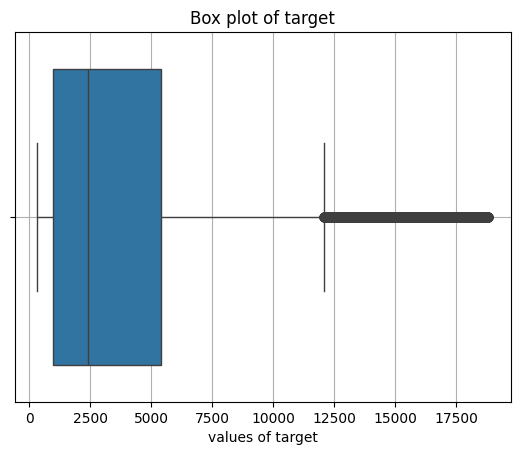

In [13]:
# Box plot of numerical columns
for col in num_columns:

    sns.boxplot(x = X[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(f"values of {col}")
    plt.grid(True)

    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_plots", f'{col}_boxplot.png'))

    plt.show()

We can see many outliers. And it is important to handle those. But it will be updated soon.

# Feature engineering

### Feature Selection

In [46]:
X_num_target = pd.concat([X[num_columns], y], axis = 1)
X_num = pd.DataFrame(X[num_columns])

X_num_target.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/05_X_num_target.csv", index = False)
X_num_target.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/06_X_num.csv", index = False)

In [29]:
X_num[num_columns].var().map('{:.5f}'.format)

carat    0.21408
depth    1.17008
table    3.68196
x        1.23082
y        1.21514
z        0.47461
dtype: object

There is no zero variance column

In [30]:
spearman_corr_matrix_target, p_values = spearmanr(X_num_target)
spearman_corr_df_target = pd.DataFrame(spearman_corr_matrix_target, columns = X_num_target.columns, index = X_num_target.columns)

spearman_corr_matrix, p_values = spearmanr(X_num)
spearman_corr_df = pd.DataFrame(spearman_corr_matrix, columns = X_num.columns, index = X_num.columns)

In [34]:
spearman_corr_df_target

,carat,depth,table,x,y,z,target
carat,1.000000,0.041616,0.236490,0.996571,0.996355,0.995100,0.971464
depth,0.041616,1.000000,-0.155237,-0.007418,-0.007715,0.109601,0.030422
table,0.236490,-0.155237,1.000000,0.240389,0.233958,0.210753,0.223147
x,0.996571,-0.007418,0.240389,1.000000,0.998210,0.990030,0.972332
y,0.996355,-0.007715,0.233958,0.998210,1.000000,0.990000,0.971596
z,0.995100,0.109601,0.210753,0.990030,0.990000,1.000000,0.968425
target,0.971464,0.030422,0.223147,0.972332,0.971596,0.968425,1.000000


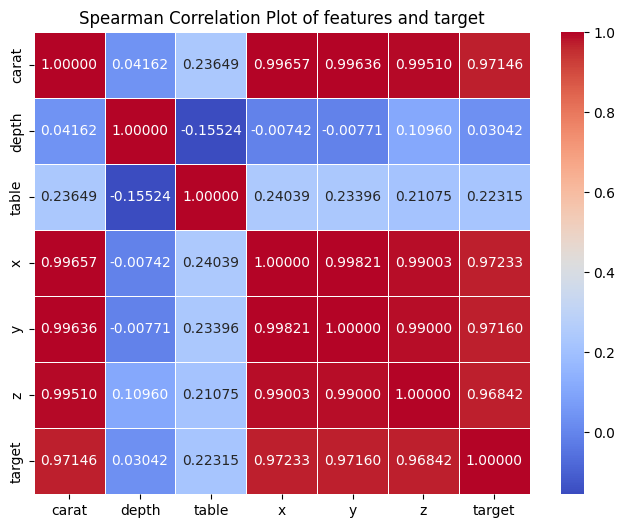

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_df_target, annot=True, cmap='coolwarm', fmt=".5f", linewidths=.5)
plt.title('Spearman Correlation Plot of features and target')
plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_plots", f'corr_num_target.png'))
plt.show()

In [38]:
# Removing the features with are least correlataed with target
threshold = 0.1 # min correlation needed to be selected

features_not_correlated_with_target = [] 

for i in range(len(spearman_corr_df_target.columns)) :
    if abs(spearman_corr_df_target.iloc[i, len(spearman_corr_df_target.columns) - 1]) < threshold :
        features_not_correlated_with_target.append(spearman_corr_df_target.columns[i])

features_not_correlated_with_target

['depth']

In [35]:
spearman_corr_df

,carat,depth,table,x,y,z
carat,1.000000,0.041616,0.236490,0.996571,0.996355,0.995100
depth,0.041616,1.000000,-0.155237,-0.007418,-0.007715,0.109601
table,0.236490,-0.155237,1.000000,0.240389,0.233958,0.210753
x,0.996571,-0.007418,0.240389,1.000000,0.998210,0.990030
y,0.996355,-0.007715,0.233958,0.998210,1.000000,0.990000
z,0.995100,0.109601,0.210753,0.990030,0.990000,1.000000


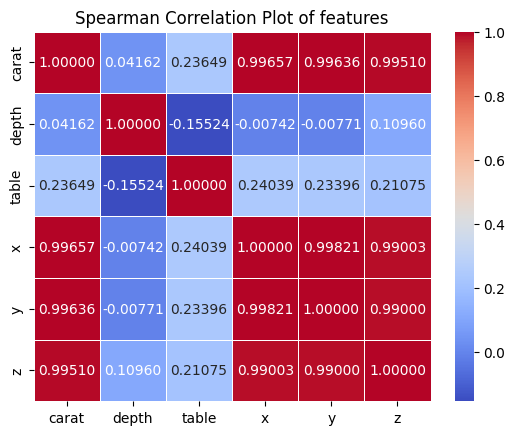

In [49]:
sns.heatmap(spearman_corr_df, annot=True, cmap = 'coolwarm', fmt = ".5f", linewidths=.5)
plt.title('Spearman Correlation Plot of features')
plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_plots", f'corr_num.png'))
plt.show()

In [40]:
# Removing the features with are highly correlated to each other
threshold = 0.85 # max correlation needed to be selected

features_correlated = {} 

for i in range(len(spearman_corr_df.columns)) :
    for j in range(len(spearman_corr_df.columns)) :
        if i == j :
            continue
        if spearman_corr_df.iloc[i, j] > threshold :
            list_key = features_correlated.get(spearman_corr_df.columns[i], [])
            list_key.append(spearman_corr_df.index[j])
            features_correlated[spearman_corr_df.columns[i]] = list_key

{'carat': ['x', 'y', 'z'],
 'x': ['carat', 'y', 'z'],
 'y': ['carat', 'x', 'z'],
 'z': ['carat', 'x', 'y']}

In [45]:
features_to_be_dropped = copy.deepcopy(features_not_correlated_with_target) + ['x', 'y', 'z']
features_to_be_dropped

['depth', 'x', 'y', 'z']

In [47]:
X.drop(columns = features_to_be_dropped, inplace = True)
X.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/07_X_MIF.csv", index = False)

In [53]:
for i in features_to_be_dropped :
    num_columns.remove(i)

# Train Validation Test Split

In [50]:
# Split ratio is 60 : 20 : 20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

X_train.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/08_X_train.csv", index = False)
y_train.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/09_y_train.csv", index = False)
X_val.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/10_X_val.csv", index = False)
y_val.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/11_y_val.csv", index = False)
X_test.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/12_X_test.csv", index = False)
y_test.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/13_y_test.csv", index = False)

In [54]:
num_scaler_pipeline = Pipeline(steps = [
                                    ('std_scaler', StandardScaler())
                                    #('min_max_scaler', MinMaxScaler())
                                ]
                       )
""" The unit vector scaling
X_train_normalized = normalize(X_train[num_columns])
X_val_normalized = normalize(X_val[num_columns])
X_train[num_columns] = pd.DataFrame(X_train_normalized, columns = num_columns)
X_val[num_columns] = pd.DataFrame(X_val_normalized, columns = num_columns)
"""

cat_nominal_encoder_pipeline = Pipeline(steps = [
                                            ('OH_encoder', OneHotEncoder())
                                        ]
                               )

cat_ordinal_encoder_pipeline = Pipeline(steps = [
                                            ('ordinalencoder', OrdinalEncoder(categories=[cut_cat, color_cat, clarity_cat])), # order should be same as in dataframe
                                            ('scaler', StandardScaler())
                                            # target guided encoding
                                        ]
                               )

feature_scaler_encoder = ColumnTransformer([
                                                ('num_pipeline', num_scaler_pipeline, num_columns), 
                                                #('cat_nominal_pipeline', cat_nominal_encoder_pipeline, cat_nominal_columns),
                                                ('cat_ordinal_pipeline', cat_ordinal_encoder_pipeline, cat_ordinal_columns)  
                                          ])

X_train_scaled_encoded = pd.DataFrame(feature_scaler_encoder.fit_transform(X_train), columns = feature_scaler_encoder.get_feature_names_out())
X_val_scaled_encoded = pd.DataFrame(feature_scaler_encoder.transform(X_val), columns = feature_scaler_encoder.get_feature_names_out())
X_train_scaled_encoded.columns = [col.split('_')[-1] for col in X_train_scaled_encoded.columns]
X_val_scaled_encoded.columns = [col.split('_')[-1] for col in X_val_scaled_encoded.columns]

# X_train_scaled_encoded_with_id = pd.concat([X_train[num_columns], X_train_scaled_encoded], axis = 1)
# X_val_scaled_encoded_with_id = pd.concat([X_val[num_columns], X_val_scaled_encoded], axis = 1)

X_train_scaled_encoded.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/14_X_train_scaled_encoded.csv", index = False)
X_val_scaled_encoded.to_csv(r"C:/ML Projects/Diamond Price Prediction/artifacts/EDA_intermediate datasets/15_X_val_scaled_encoded.csv", index = False)

In [55]:
X_train = X_train_scaled_encoded
X_val = X_train_scaled_encoded
X_train_scaled_encoded

,carat,table,cut,color,clarity
0,-0.563500,-0.638474,0.100597,1.549303,0.017644
1,-0.520356,0.925634,1.233972,0.934631,0.017644
2,0.471953,-0.638474,1.233972,0.319958,-1.314349
3,0.644528,1.447003,1.233972,-1.524058,0.017644
4,0.493525,-1.159843,0.100597,-0.294714,0.683640
...,...,...,...,...,...
123881,-0.412496,0.925634,1.233972,0.934631,0.683640
123882,-1.016510,-1.681212,0.100597,-0.909386,-0.648353
123883,-0.196777,0.925634,1.233972,0.319958,-0.648353
123884,1.572121,1.447003,1.233972,-1.524058,-0.648353
